In [32]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency
sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline 

Importing the dataset

In [3]:
# importing the dataset
data = pd.read_csv("Visadataset.csv")
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# checking the shape of the dataset
data.shape

(25480, 12)

In [5]:
# checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# checking for null values in the dataset
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
# summary of the dataset
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [8]:
data["case_id"].dtypes

dtype('O')

**Exploratory Data Analysis**

In [9]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != "O"]
categorical_features = [feature for feature in data.columns if data[feature].dtype == "O"]

In [10]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [11]:
print("we have {} numerical features: {}".format(len(numerical_features), numerical_features))

print("\nwe have {} categorical features: {}".format(len(categorical_features), categorical_features))

we have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

we have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [17]:
for feature in categorical_features:
    print(data[feature].value_counts(normalize = True) * 100)
    print("_______________________")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
_______________________
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
_______________________
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
_______________________
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
_______________________
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
_______________________
region_of_employment
Northeast    28.237834
South      

**Insights**

`case_id`: have unique vlaues for each column which can be dropped as it it of no importance  
`continent`:  column is highly biased towards asia. hence we can combine other categories to form a single category.  
`unit_of_wage`: seems to be an important column as most of them are yearly contracts.

**Univariate Analysis**

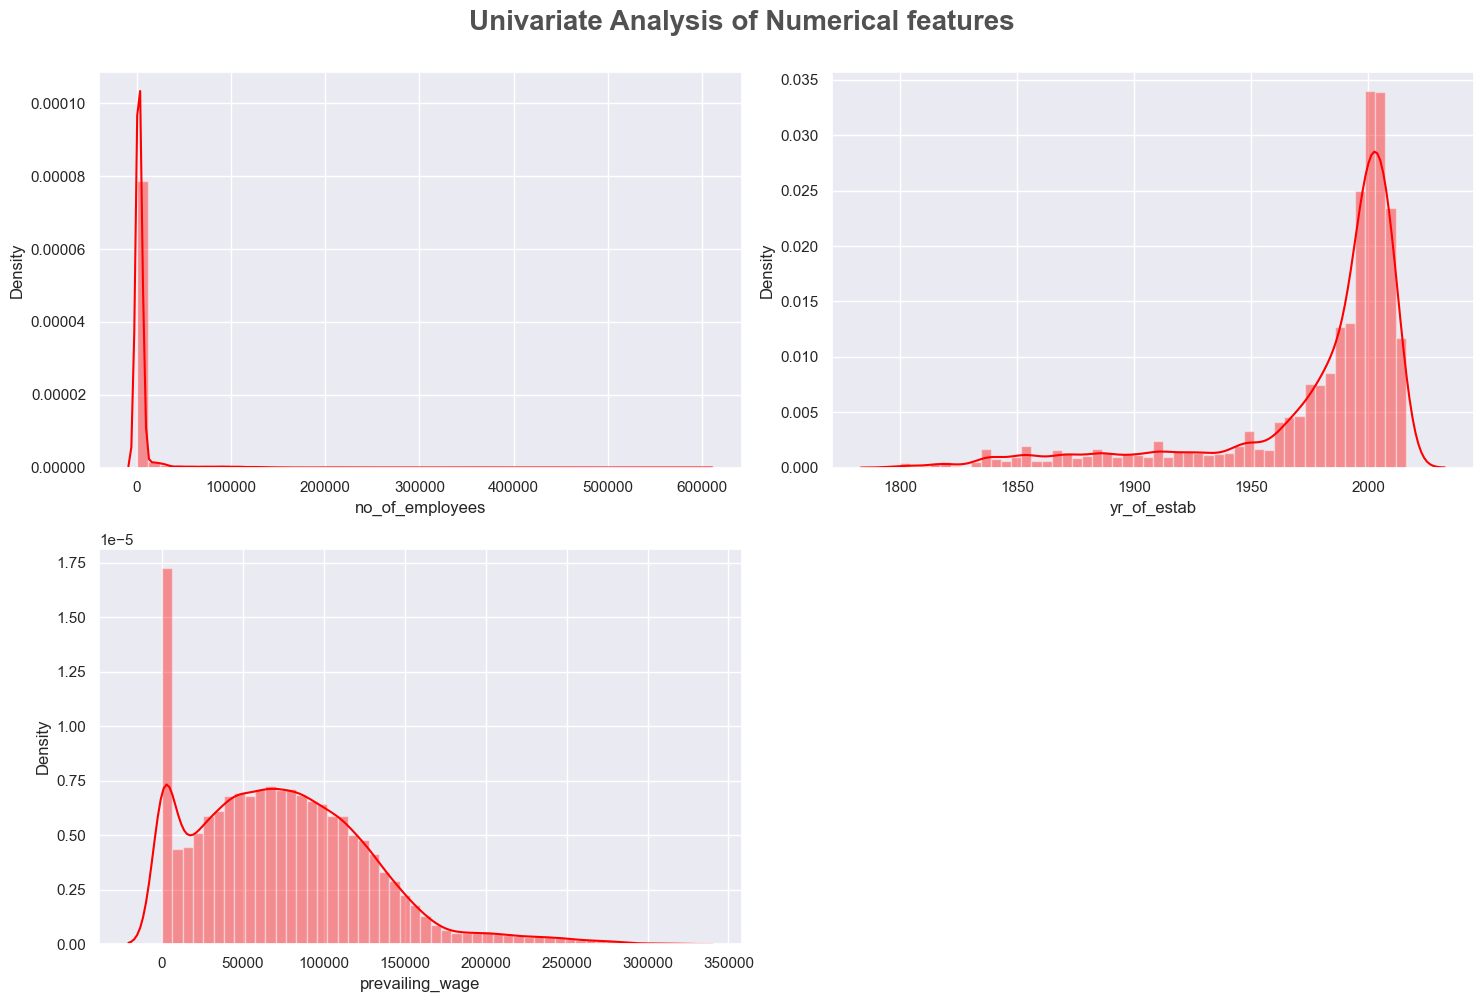

In [24]:
# Numberical features
plt.figure(figsize = (15, 10))
plt.suptitle("Univariate Analysis of Numerical features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i + 1)
    sns.distplot(x = data[numerical_features[i]], color = "red", kde = True)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    # plt.show()

In [22]:
categorical_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

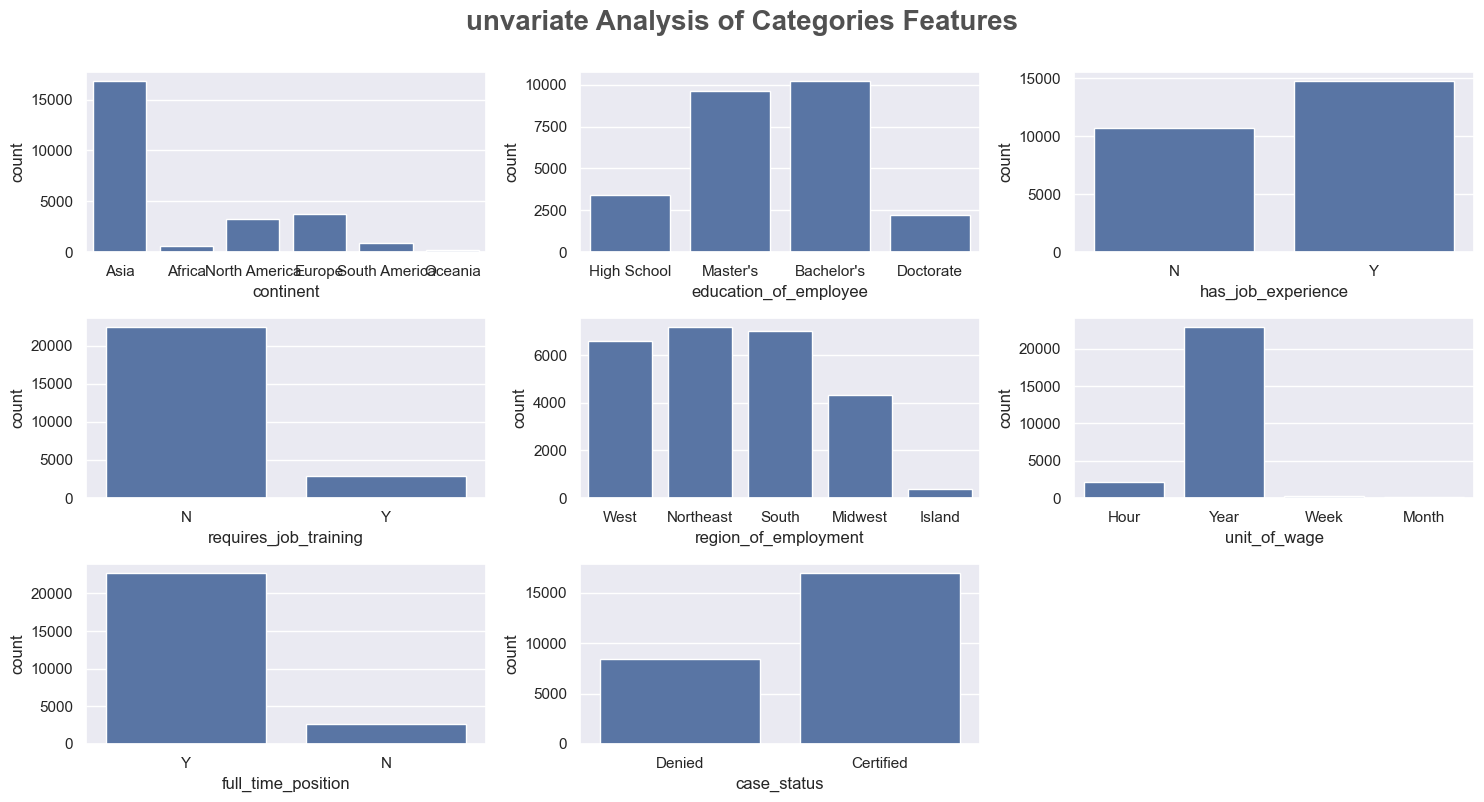

In [23]:
categorical_features.remove("case_id")
plt.figure(figsize = (15, 8))
plt.suptitle("unvariate Analysis of Categories Features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)

for i in range (0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = data[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insight**

`requires_job_training`, `unit_of_wage`, `full_time_position`, and `continents` columns have a single category dominating

Multivariate Analysis

In [30]:
discrete_features = [feature for feature in numerical_features if len(data[feature]) <= 25]
continous_features = [feature for feature in numerical_features if len(data[feature]) > 25]

print("we have {} discrete feature: {}".format(len(discrete_features), discrete_features))
print("we have {} continous feature: {}".format(len(continous_features), continous_features))

we have 0 discrete feature: []
we have 3 continous feature: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


*Check for Multicollinearity*

A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (*H0*): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (*H1*): The Feature and Target column are not independent (Correlated)

In [38]:
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['case_status'], data[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ["Column", "Hypothesis"]
result

,Column,Hypothesis
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


`requires_job_training` fails to reject the null hypothesis indicating that it does not correlates with the target variable

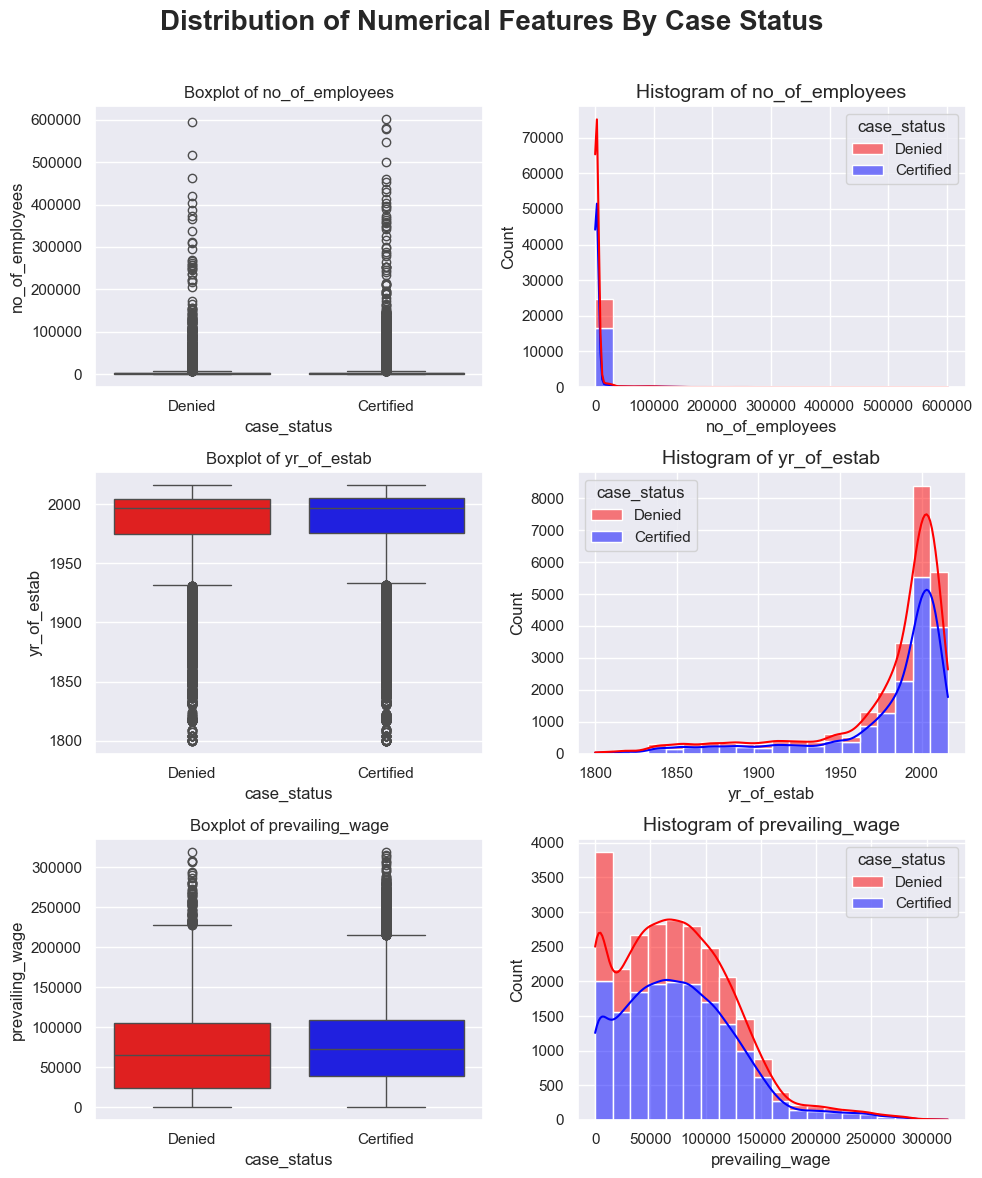

In [43]:
colour = ["red", "blue"]

fig, ax = plt.subplots(3, 2, figsize = (10, 12))
fig.suptitle("Distribution of Numerical Features By Case Status", fontsize = 20, fontweight = "bold", ha = "center")

for i, col in enumerate(continous_features):
    sns.boxplot(data = data, x = "case_status", y = col, palette = colour, ax = ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize = 12)
    sns.histplot(data = data, x = col, hue = "case_status", bins = 20, kde = True, multiple = "stack", palette = colour, ax = ax[i,1])
    ax[i, 1].set_title(f"Histogram of {col}", fontsize = 14)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
# plt.savefig('image/multivariate_num.png')


**Initial Analysis Report**

`No of Employees` has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.

`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.

`prevailing_wage` is right skewed with outliers above upper bound of box plot.

The `case_id` column can be deleted because each row has unique values.

The `case_status` column is the target to predict.

In the Categorical column, features can be made Binary numerical in feature Encoding

There are No missing values in the dataset.

**Visualization**

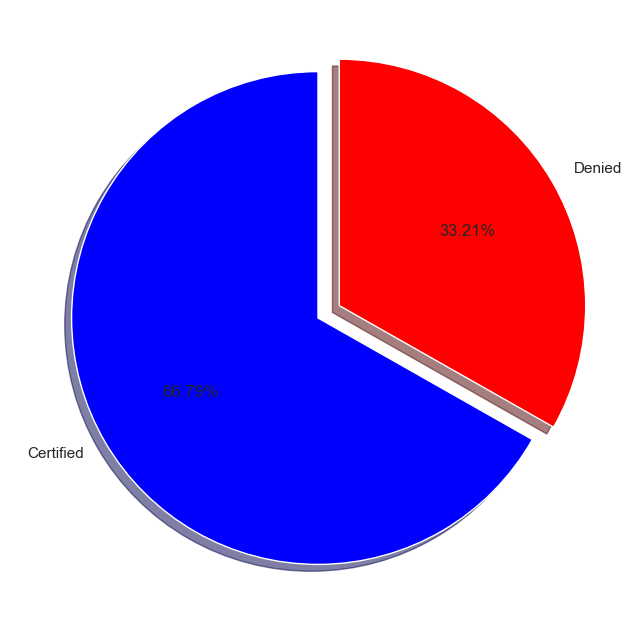

In [61]:
# Visualizing the Target variable
percentage = data["case_status"].value_counts(normalize = True) * 100
labels = ["Certified", "Denied"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize = (15, 8))
explode = (0, 0.1)
colour = ["blue", "red"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
plt.show()


From the chart it is seen that the Target Variable is **Imbalanced**

**Does applicant Continent has any impact on Visa status ?**

In [71]:
# group data by continent and their case_status
data.groupby("continent")["case_status"].value_counts(normalize = True).to_frame()* 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

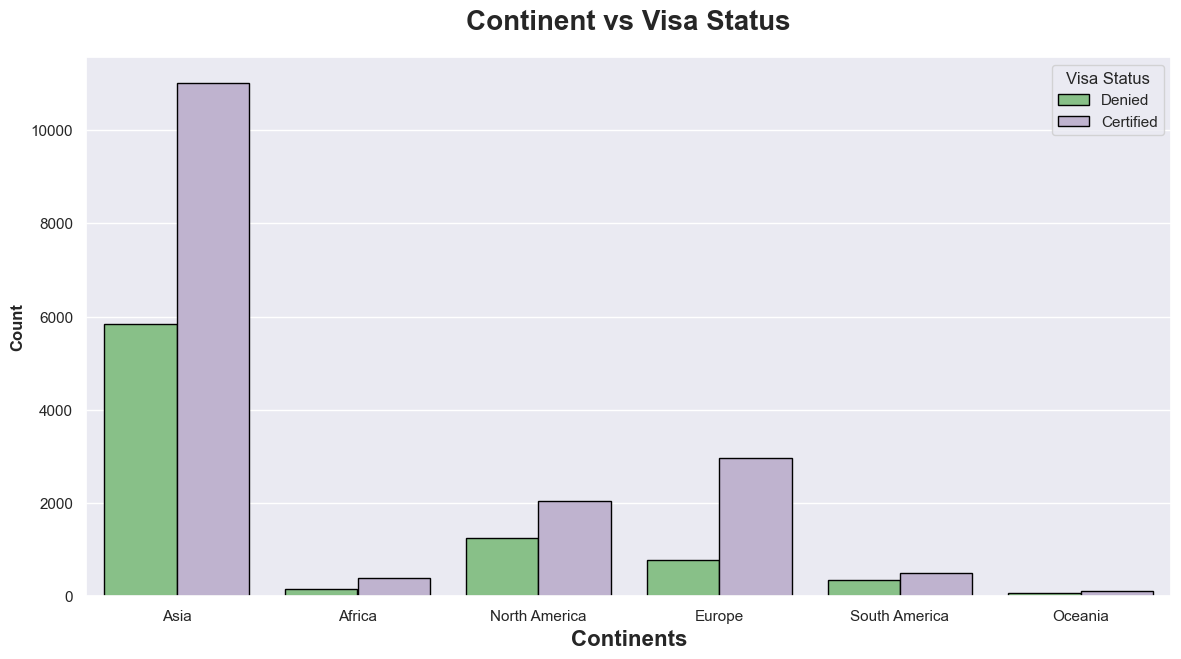

In [73]:
plt.subplots(figsize=(14,7))
sns.countplot(x ="continent", hue="case_status", data = data, ec = "black", palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [ ]:
data2 = data.copy()

In [ ]:
plt.figure(figsize=[14,7])

(100*data2[data2["case_status"].isin(['Certified'])]['continent'].value_counts()/data2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*data2[data2["case_status"].isin(['Certified'])]['continent'].value_counts()/data2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()